In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **USA Craig's List Housing Listings**


## In this project we observe and analyze the USA housing Listings (rentals) dataset from Kaggle. We formulate questions that interest us about the data and factors that influence price, some general knowledge about the properties and testing against two scenarios to determine the best living spaces that fit two theoretical client's needs.



**Details form Kaggle:**

About Dataset
Context
Craigslist is the world's largest collection of privately sold housing options, yet it's very difficult to collect all of them in the same place. I built this dataset as a means in by which to perform experimental analysis on the United States states as a whole instead of isolated urban housing markets.

Content
This data is scraped every few months, it contains most all relevant information that Craigslist provides on retail sales

Source: https://www.kaggle.com/datasets/austinreese/usa-housing-listings


# **Investigation**

1. Where can you get the best bang for your buck as a single person living in the United States looking for a place to rent?

2. Where can you get the most out of a rental for a married couple with 2 kids?

## **Assumptions**
- Min Budget is 15% of Salary and Max Budget is 30%.
- 70k dollars Median salary for single person. 
- 130k dollars Married couple Median salary. 


In [4]:
#@title Importing packages 
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# **Importing the Data**

In [5]:
#@title Importing CSV
#importing as csv

data = pd.read_csv('/content/drive/MyDrive/Data6505 Final Project/housing.csv') #Jose

#data = pd.read_csv('')# Riccardo

# data = pd.read_csv('/content/drive/MyDrive/Real Estate project/housing.csv') #Arman

data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


## **Initial Observations**

In [6]:
#@title Viewing the columns and data types
#understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

### The dataset shows some valuable information about living spaces and their features such as laundry, parking, square footage, bedrooms, pets allowed etc.



In [7]:
#@title 384977 rows, 22 columns
#Rows and columns

data.shape #384977 rows, 22 columns

(384977, 22)

In [8]:
#@title Viewing the columns in DF
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [9]:
#@title Summary Statistics

#Summary Statistics

data.describe()


,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


# **1. Cleaning the Data**

# 1.1 Creating Constraints

In [10]:
#@title Creating a copy of the data
#Making changes to the data
df = data.copy()

Text(0.5, 1.0, 'Housing Type Distribution')

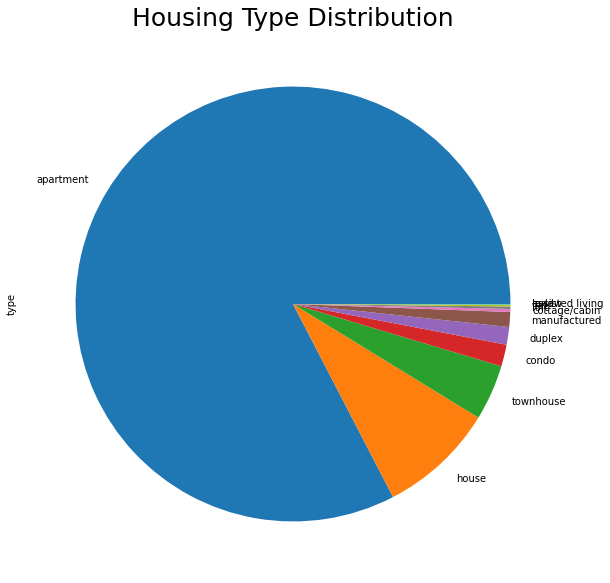

In [11]:
#@title Creting a Pie chart to see the distribution of the type of houses
df['type'].value_counts().plot(kind='pie', figsize=(10,10))
plt.title('Housing Type Distribution', fontsize=25)


In [12]:
#@title Identifying missing data
df.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [13]:
#@title If we should drop any column
df.dropna(how='any', inplace=True)


In [14]:
#@title Cofiguring the shape of the dataset. 235969 Rows and 22 columns
df.shape

(235969, 22)

In [15]:
#@title Getting an idea of the distribution of the data
df.type.value_counts()

apartment          186096
house               22219
townhouse           12869
condo                4711
duplex               4490
manufactured         3820
cottage/cabin         598
loft                  554
flat                  458
in-law                144
land                    8
assisted living         2
Name: type, dtype: int64

In [16]:
#@title Our company specializes in Apartments
# We only need to look at Apartments

apt_df = df[df['type'] == 'apartment']

apt_df['type'].value_counts()

apartment    186096
Name: type, dtype: int64

In [17]:
#@title Removed all the apartments price below 875 dollars and  over 3250 dollars
#price has a lot of 0 values which are not helpful.
# we will drop anything beow $875 or over $1751 budget range

apt_df = apt_df[((apt_df['price'] >= 875) & (apt_df['price'] <= 3250))]

## Square Footage

In [18]:
#@title remove apartments below 700sq and over 3000sq

# Most states have adopted building and zoning codes from the 
#International Residential Code (IRC). The IRC codes require 
#that all homes must be built on a minimum of 320 square feet.

apt_df = apt_df[((apt_df['sqfeet'] >= 700) & ( apt_df['sqfeet'] <= 3000))] #going to raise this to avg sqfeet/reaosonable

apt_df['sqfeet'].sort_values()

160793     700
77486      700
358090     700
211575     700
211779     700
          ... 
214087    3000
215304    3000
213565    3000
215303    3000
215301    3000
Name: sqfeet, Length: 105621, dtype: int64

In [19]:
#@title Filtering apartments with atleast one bedrooms and over 4 bedrooms 
# We only want to consider apartments with at least 1 bed

apt_df = apt_df[((apt_df['beds'] != 0) & (apt_df['beds'] <= 4 ))]

apt_df.beds.value_counts()

2    63896
1    24077
3    16190
4     1176
Name: beds, dtype: int64

## 1.2 Dealing with Duplicates

In [20]:
#@title Checking for duplicates
# No dupes!!!

apt_df.duplicated().sum()

0

# **2. Outliers**

## 2.1 Identifying numeric columns and managin outliers

In [21]:
#@title Columns
#This will select columns where numeric types are detected

numtypes = apt_df.select_dtypes(include='number')

#We get a list of numerical columns
numtypes.columns

Index(['id', 'price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'lat', 'long'],
      dtype='object')

In [22]:
#Some numerical data is categorical such as 'cats_allowed',
#'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
#'electric_vehicle_charge', 'comes_furnished'.

#In additional lattitude and longitude are locational data.

#None of the above are useful for outlier detection

numtypes.head()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
0,7049044568,1148,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.796
2,7043634882,1813,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.708
3,7049045324,1095,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771
7,7049041899,1095,708,1,1.0,1,1,1,0,0,0,39.4477,-119.771
8,7049041451,1525,1053,2,2.0,1,1,0,0,0,0,39.6185,-119.672


## 2.2 Visualizing the Outliers in each column that concerns us

Text(0.5, 1.0, 'Price')

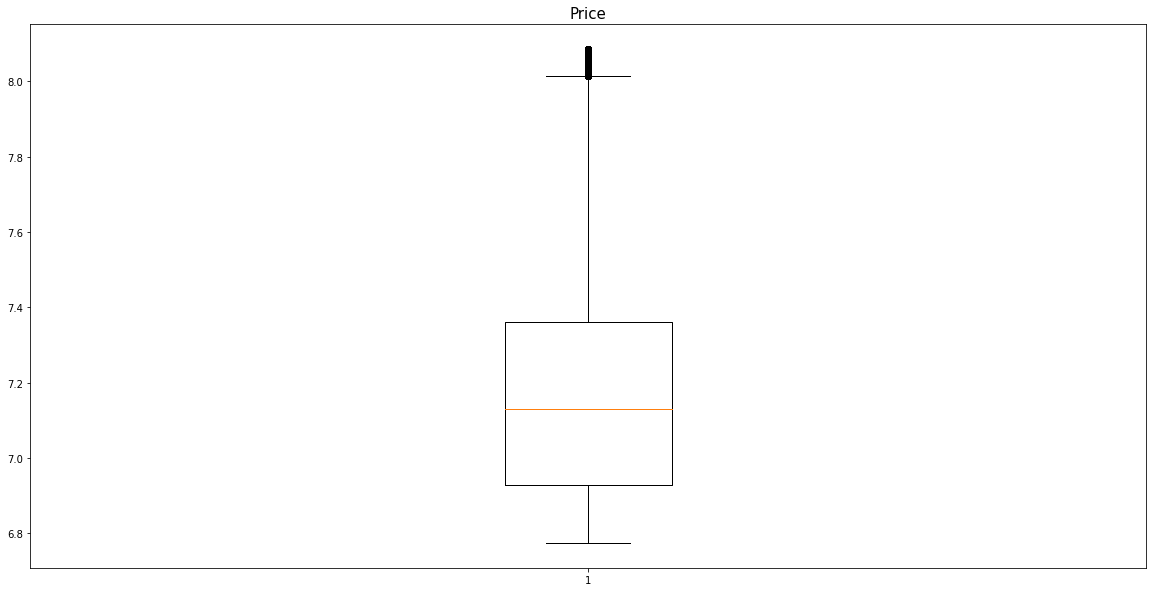

In [23]:
#We can now use the appropriate columns to detect outliers

fig, (ax1) = plt.subplots(1, 1, sharey=False, figsize=(20, 10))

#Use np.log to better visualize the outliers since some of the values are 
#extremely out of range of the 75 percentile
ax1.boxplot(np.log(apt_df['price']))
ax1.set_title('Price', fontsize=15)



# df[['price', 'sqfeet', 'beds', 'baths']].plot(kind='box', figsize=(20,20))

## 2.3 Function for replacing outlier with upper and lower bound values

In [24]:
#@title Dealing with outliers
def outlier_replace(col):
  '''
  # This function takes a series (column)
  and replaces detected outliers with the 
  lower and uper bounds of the data.
  ---
  Input:
  col(float or int): A column of choice either 
  int or float.
  ---
  Output:
  The column with the outlier values replaced
  with lower and upper bound values of the date
  '''
  q1 = np.quantile(col, .25) #1st quantile
  q3 = np.quantile(col, .75) #3rd quantile

  iqr = q3 - q1 #The interquartile range. The middle 50% of the observations

  bound_lower = q1 - 1.5 * iqr #lower bounds
  bound_upper = q3 + 1.5 * iqr #upper bounds

  #replace values below the lower bounds with the lower bound value
  col = np.where(col < bound_lower, bound_lower, col) 

  #replace values above the upper bounds with the upper bound value
  col = np.where(col > bound_upper, bound_upper, col)


  return  col 

In [25]:
# Applying the function to the columns that concern us

apt_df['price'] = outlier_replace(apt_df['price'])




Text(0.5, 1.0, 'Price')

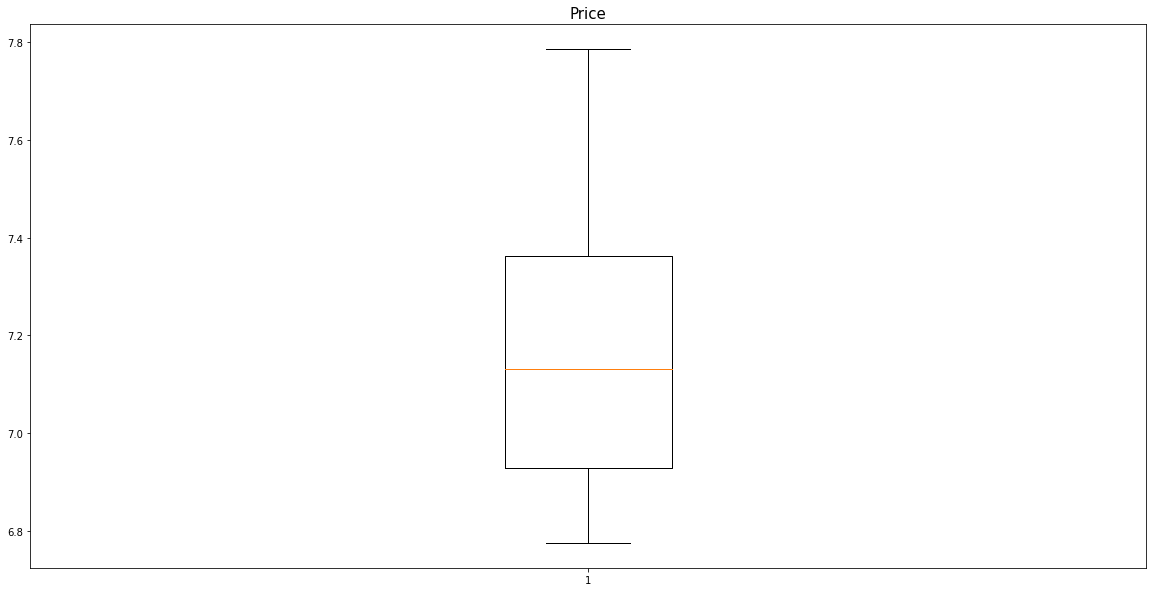

In [26]:
fig, (ax1) = plt.subplots(1, 1, sharey=False, figsize=(20, 10))

#Use np.log to better visualize the outliers since some of the values are 
#extremely out of range of the 75 percentile
ax1.boxplot(np.log(apt_df['price']))
ax1.set_title('Price', fontsize=15)







In [27]:
df.shape

(235969, 22)

# **3. Analysis**

<ipython-input-28-204cd39b3b8a>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


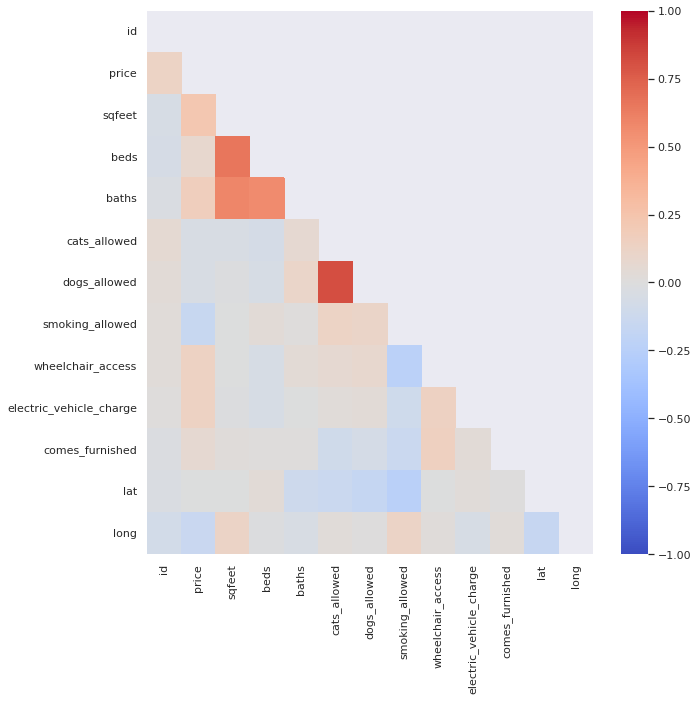

In [28]:
#@title What features are most correlated with eachother?
#What features are most correlated and least correlated?

corr = apt_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr, vmin= -1, vmax= 1, cmap='coolwarm', mask=mask)

Text(0.5, 1.0, 'Price Distribution')

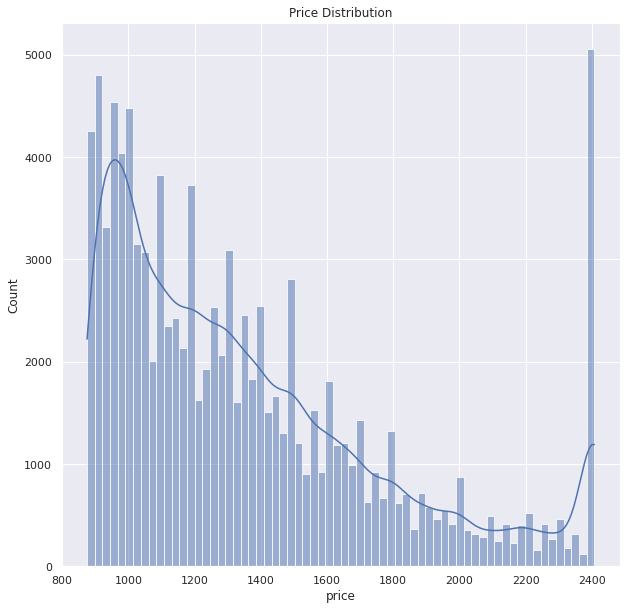

In [29]:
#@title Price Distribution of apartments 
#Price Distribution

sns.histplot(apt_df.price, kde=True).set_title('Price Distribution')

## 3.1 Top 10 Average rents by State

In [30]:
#@title Top 10 states with highest average rent
#top 10 state by average price
apt_df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

state
hi    2045.968127
dc    1832.672500
ma    1803.664909
nj    1745.285311
ca    1729.939838
nh    1706.817040
ri    1612.574558
co    1552.892443
vt    1549.232653
me    1495.526163
Name: price, dtype: float64

## 3.2 Highest Rent by States

Text(0, 0.5, 'Avg Rent')

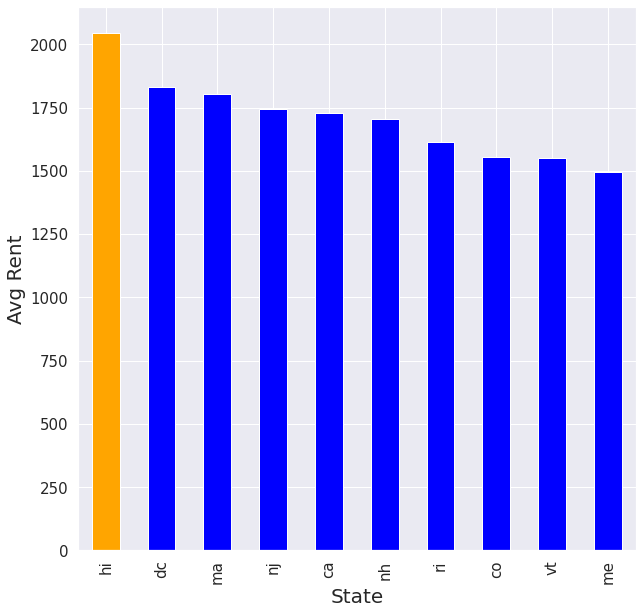

In [31]:
#@title  Top 10 States with Highest Average Rent
apt_df.groupby('state')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,10), color=['orange', 'blue', 'blue', 'blue','blue','blue', 'blue', 'blue','blue', 'blue'])
plt.xlabel('State', fontsize=20)
plt.ylabel('Avg Rent', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Avg Rent')

Text(0.5, 1.0, 'Price Distribution in Hawaii')

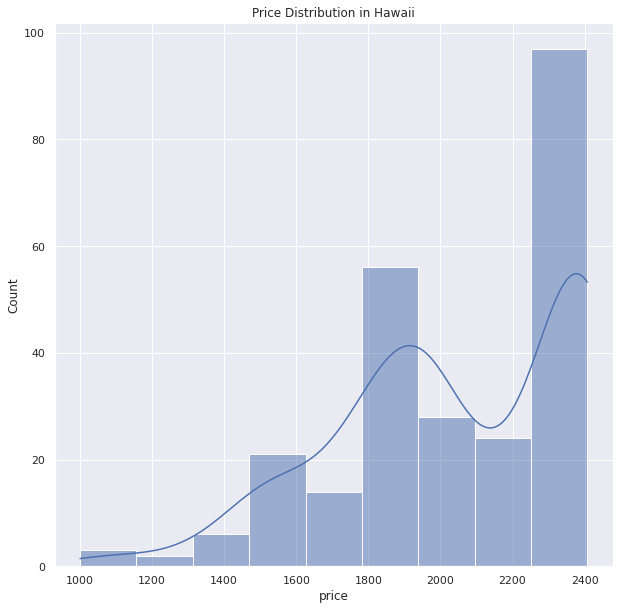

In [32]:
#@title Price distribution of apartments in Hawaii
#After doing external research we determined this is likely due to it being expensive to buy
#Native owned land in Hawaii.

sns.histplot(apt_df.price[apt_df.state == 'hi'], kde=True).set_title('Price Distribution in Hawaii')

In [33]:
#@title Median and mode price of appartments 
#Most frequent price in Hawaii in this set

print('Mode:\n' , apt_df.price[apt_df.state == 'hi'].mode(), '\n\nMedian:\n', apt_df.price[apt_df.state == 'hi'].median())

Mode:
 0    2407.5
dtype: float64 

Median:
 2000.0


## 3.3 Lowest Rent AVG?

Text(0, 0.5, 'Avg Rent')

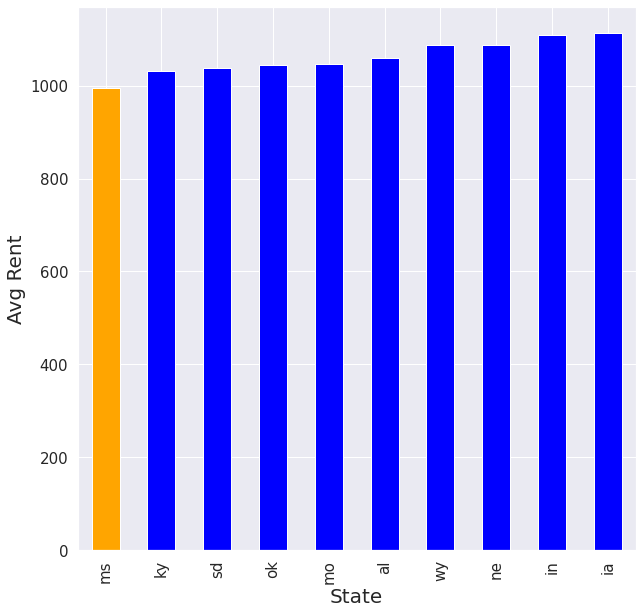

In [34]:
#@title Lowest Average Rent by state
apt_df.groupby('state')['price'].mean().sort_values(ascending=True).head(10).plot(kind='bar', figsize=(10,10), color=['orange','blue','blue', 'blue', 'blue', 'blue','blue', 'blue', 'blue', 'blue'])
plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Avg Rent', fontsize=20)
plt.ylabel('Avg Rent')

Text(0.5, 1.0, 'Price Distribution in Mississippi')

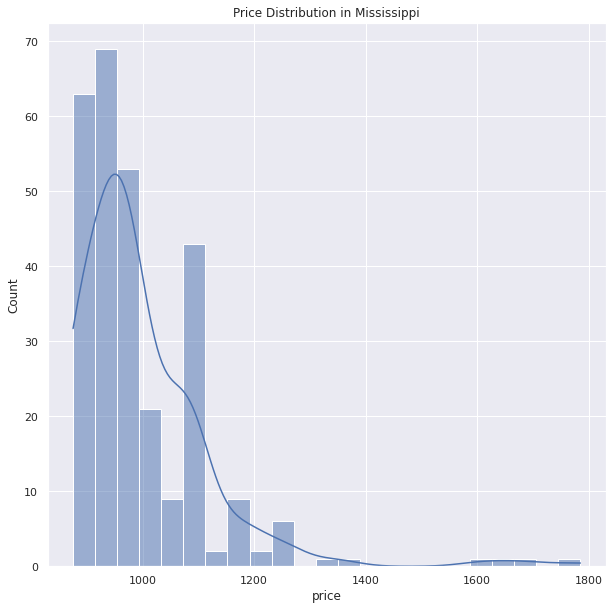

In [35]:
#@title Distribution of price in Mississippi
sns.histplot(apt_df.price[apt_df.state == 'ms'], kde=True).set_title('Price Distribution in Mississippi')

In [36]:
#@title Median and Mode price of Mississippi
print('Mode:\n' , apt_df.price[apt_df.state == 'ms'].mode(), '\n\nMedian:\n', apt_df.price[apt_df.state == 'ms'].median())

Mode:
 0    875.0
dtype: float64 

Median:
 970.0


## 3.4 Relationship between price and square footage

In [37]:
#@title Correlation between Price and Sqfeet
apt_df[['price', 'sqfeet']].corr() #prices vary dratically acroos the country and likely is 
#producing noise

,price,sqfeet
price,1.000000,0.226693
sqfeet,0.226693,1.000000


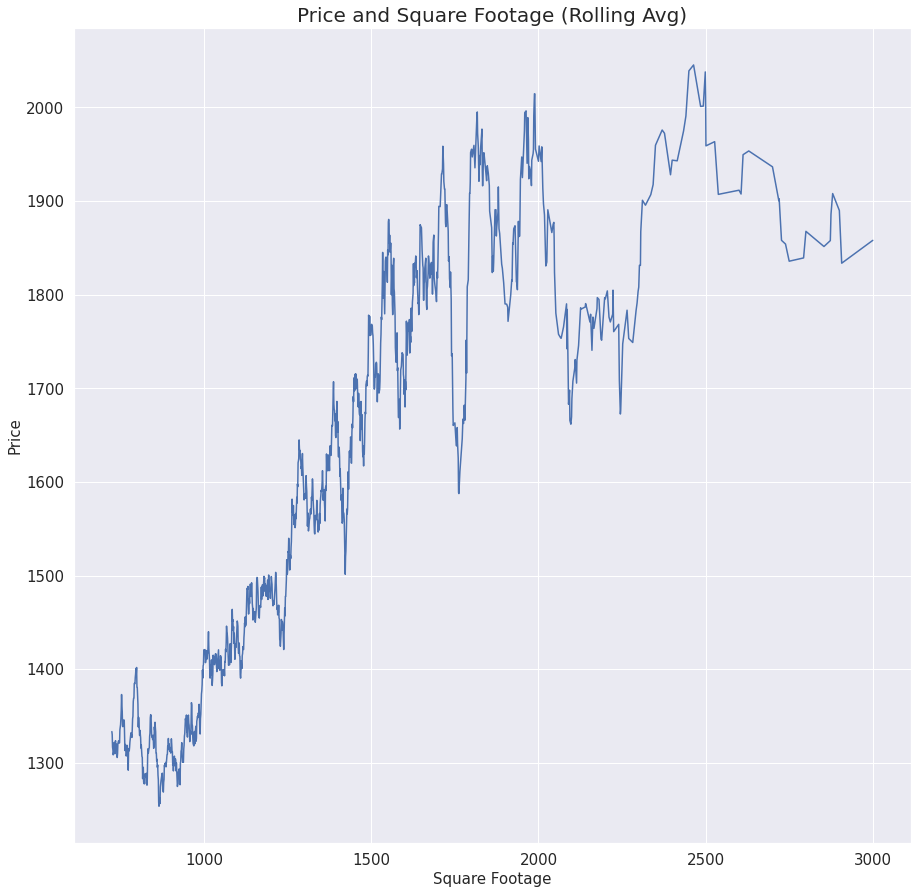

In [38]:
#@title Trend for Price and Sq feet
#At some point price do not increase with SQ, that is beacue at that point other feature began to matter (Such as location)
#This plot is to illustrate the trend. We found that there were too many trends to plot
#and resorted to using a rolling average of the average.


grouped = apt_df.groupby('sqfeet')['price'].mean().rolling(25).mean() #We need the mean function to plot this
#But we also need to declare the rolling average because there are too many mean values to plot
#and plot the trend.

x = grouped.index.values #the groupby column is the index. 
#We want the values of the index column which represent sqfeet

y = grouped.values #price


plt.figure(figsize=(15,15))
plt.plot(x,y)

plt.title('Price and Square Footage (Rolling Avg)', fontsize=20)
plt.xlabel('Square Footage', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.yticks(fontsize=15)
plt.style.use('ggplot')




### There is a correlation between square footage and price.

## 3.5 Average Price of Smoking vs No Smoking 

In [39]:
#@title Appartment with Smoking Facility
apt_df['smoking_status'] = np.where(apt_df['smoking_allowed'] == 0 , 'no', 'yes')

In [40]:
apt_df.pivot_table(index=['smoking_status'], values='price', aggfunc='mean')

,price
smoking_status,
no,1446.723551
yes,1311.896199


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

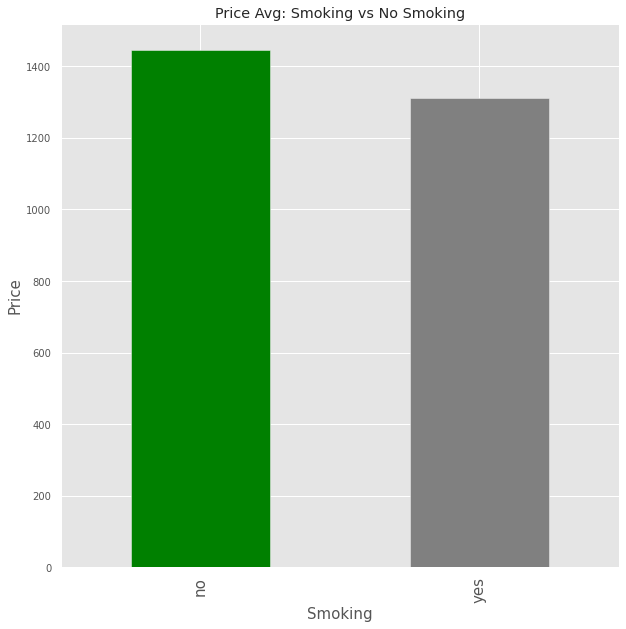

In [41]:
#@title Correlation of Smoking at price 
apt_df.groupby('smoking_status')['price'].mean().plot(kind='bar', color=['green', 'grey'], figsize=(10,10))
plt.title("Price Avg: Smoking vs No Smoking")
plt.xlabel('Smoking', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Price', fontsize=15)
plt.yticks(fontsize=10)

## 3.6 Does the amount of listings in a State effect Price?

## Number of Listings per State

Text(0.5, 1.0, 'Apartments Available')

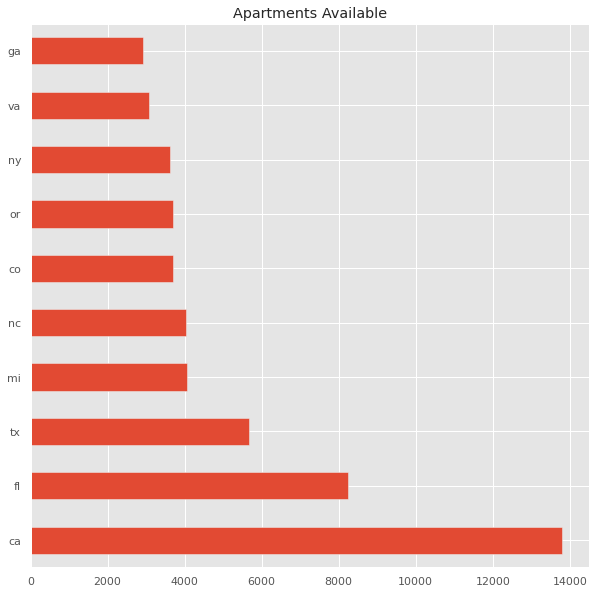

In [42]:
#@title States that have most ammount of appartments avaialble
apt_df['state'].value_counts().head(10).plot(kind='barh')
plt.title('Apartments Available')

# Percentage of listing per state

Text(0.5, 1.0, 'Percentage of listing in each state')

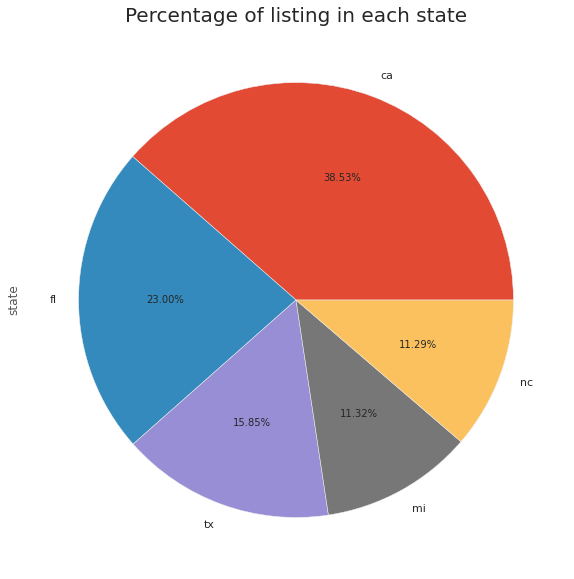

In [43]:
#@title Percentage of listing in each state
#Over 20% of the properties listed are in CA, FL, Texas, 3 of the largest most populated states

round(apt_df['state'].value_counts() * 100/ len(apt_df), 2).head(5).plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of listing in each state',fontsize=20)

In [44]:
#@title Quantity of appartment available in different states
#Spliting amounts of listing into categories: high and low.

over_5k = apt_df['state'].value_counts()[:14].index
over_5k

Index(['ca', 'fl', 'tx', 'mi', 'nc', 'co', 'or', 'ny', 'va', 'ga', 'wa', 'pa',
       'tn', 'mn'],
      dtype='object')

In [45]:
#@title checking to see if the number of appartments avaialble per state is effecting the average price we see
#Testing of number of listings affects price

#Create category columns for number of properties listed

boolnames = apt_df['state'].isin(over_5k)

apt_df['property_count_cat'] = np.where(boolnames == True, 'High', 'Low')


In [46]:
#@title  1.1
high_prop, low_prop = apt_df[apt_df['property_count_cat'] == 'High'], apt_df[apt_df['property_count_cat'] == 'Low']

high_prop.shape, low_prop.shape

((63891, 24), (41448, 24))

In [47]:
#@title 1.2
high_prop_sample = high_prop.sample(n=41448, random_state=42)

high_prop_sample.shape

(41448, 24)

##Null hypothesis: The obeservation of quatity of appartment per state, however uneven does not make a difference in the average price. 

In [48]:
#@title Default title text
from scipy import stats


high_property = high_prop_sample['price']

low_property = low_prop['price']

t2, p2 = stats.ttest_ind(high_property,low_property)
print("t = " + str(t2))

#if p < 0.05 we can reject the null hypothesis
print("p = " + str(p2)) #the null hyptohesis assumes paid classes make no difference


t = 25.903478979104257
p = 2.3580395326878918e-147


###We can reject the null hypothesis because we have a t-value much greater than 1.96 and P-Value < 0.05

### No correlation between amount of properties in the data set and the price.

## 3.7 Relationship between laundry options and price

Text(0.5, 1.0, 'Laundry Option Distribution')

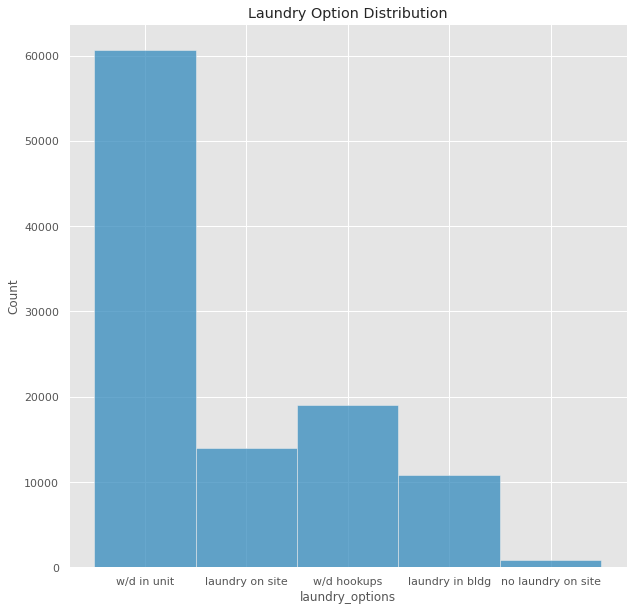

In [49]:
#@title Distribution of Laundry Types
sns.histplot(apt_df.laundry_options, kde=False).set_title('Laundry Option Distribution')

Text(0.5, 1.0, 'Distribution of Laundry types by price')

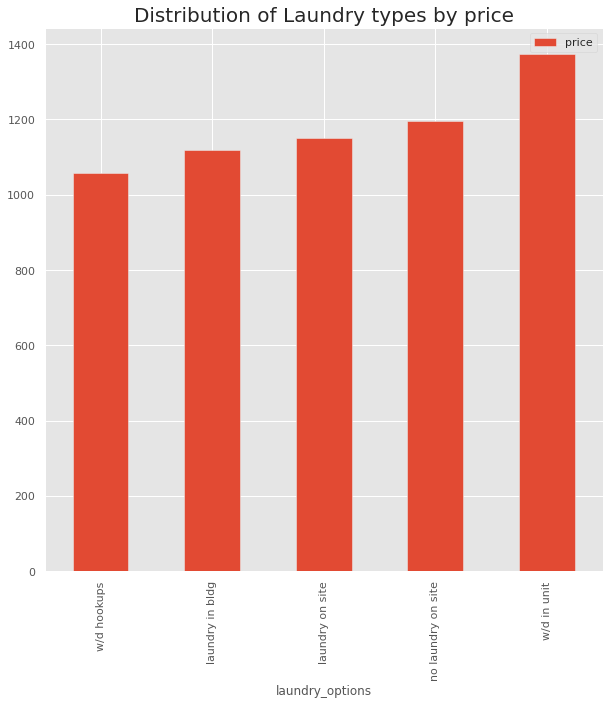

In [50]:
#@title Distribution of Laundry types by price
#sns.histplot(y='price',x='laundry_options',data=apt_df, hue='laundry_options')
apt_df.pivot_table(index = 'laundry_options', values = 'price', aggfunc = 'median').sort_values('price').plot(kind='bar')
plt.title('Distribution of Laundry types by price', fontsize = 20)

In [51]:
#@title distribution of top 10 and other states
#Visualizng top 10 States (by # of listings) in crosstab

apt_df['top_or_other'] = np.where(boolnames == False, 'Other', apt_df['state'])

apt_df['top_or_other'].value_counts()

Other    41448
ca       13796
fl        8242
tx        5679
mi        4057
nc        4040
co        3705
or        3691
ny        3607
va        3068
ga        2910
wa        2854
pa        2840
tn        2708
mn        2694
Name: top_or_other, dtype: int64

In [52]:
#@title Visualizint the laundry option in top states
pd.crosstab(index=apt_df['top_or_other'], columns=apt_df['laundry_options'], normalize='index').round(2)

laundry_options,laundry in bldg,laundry on site,no laundry on site,w/d hookups,w/d in unit
top_or_other,,,,,
Other,0.13,0.10,0.01,0.15,0.62
ca,0.06,0.28,0.00,0.10,0.55
co,0.08,0.15,0.00,0.05,0.73
fl,0.02,0.16,0.00,0.24,0.57
ga,0.01,0.06,0.00,0.57,0.35
mi,0.35,0.07,0.00,0.09,0.49
mn,0.24,0.09,0.00,0.01,0.66
nc,0.01,0.04,0.04,0.46,0.46
ny,0.32,0.08,0.04,0.10,0.45


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

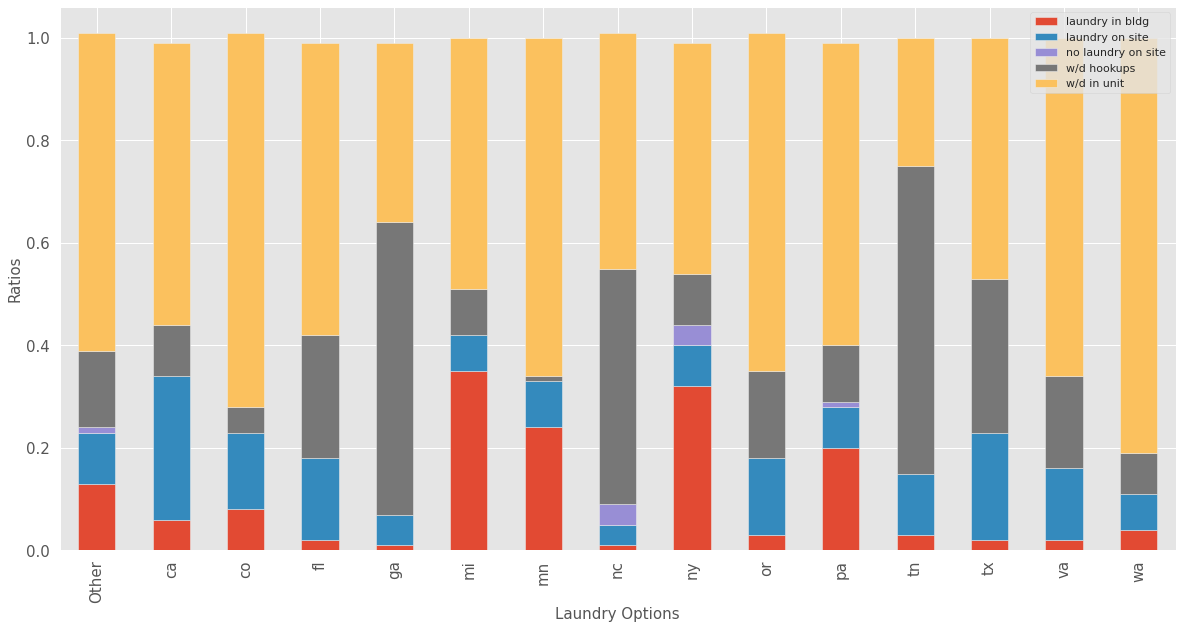

In [53]:
#@title Visualization the laundry option in top states
pd.crosstab(index=apt_df['top_or_other'], columns=apt_df['laundry_options'], normalize='index').round(2).plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('Laundry Options', fontsize=15)
plt.ylabel('Ratios', fontsize=15)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## In California, Orgeon and Virginia w/d in unit are most common.

# **4. Scenarios**

# Scenario 1: Bachelor

**Assumptions**

- 1 Bed
- 1 Bath
- Parking (Preferred)
- W/D in unit (preferred)
- 1 Pet (preferred)
- Comes furnished (preferred)
- Smoking free


## Based on Price and Square Footage these are the best places to rent a 1 bedroom Apartment on Average.

In [54]:
#@title created a dataframe of one bedroom appartments
# DF to represent only 1 bedroom apartments
one_bed = apt_df[(apt_df['beds'] == 1) & (apt_df['price'] <= 1750)]
one_bed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20498 entries, 3 to 384962
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       20498 non-null  int64  
 1   url                      20498 non-null  object 
 2   region                   20498 non-null  object 
 3   region_url               20498 non-null  object 
 4   price                    20498 non-null  float64
 5   type                     20498 non-null  object 
 6   sqfeet                   20498 non-null  int64  
 7   beds                     20498 non-null  int64  
 8   baths                    20498 non-null  float64
 9   cats_allowed             20498 non-null  int64  
 10  dogs_allowed             20498 non-null  int64  
 11  smoking_allowed          20498 non-null  int64  
 12  wheelchair_access        20498 non-null  int64  
 13  electric_vehicle_charge  20498 non-null  int64  
 14  comes_furnished      

In [55]:
#@title Group the data by Region and State
one_bed.groupby(['region', 'state'])[['price' ,'sqfeet']].mean().sort_values('sqfeet', ascending=False).head(10)

,,price,sqfeet
region,state,,
la crosse,wi,1317.5,1275.500000
rockford,il,1120.0,1166.000000
lawton,ok,1599.0,1160.000000
monroe,mi,975.0,1110.000000
albany,ga,890.0,1075.000000
harrisonburg,va,1295.0,1050.000000
mankato,mn,1400.0,1048.000000
brownsville,tx,950.0,1044.000000
hickory / lenoir,nc,1019.0,1040.250000


## Considering W/D in unit, comes furnished, pets allowed , price and sqfeet

<ipython-input-56-c730add76391>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one_bed[((df['laundry_options'] == 'w/d in unit')  & (df['comes_furnished'] == 1) & (df["cats_allowed"] == 1) & (df['dogs_allowed'] == 1) & (one_bed['smoking_status'] == 'yes'))].groupby(['region','state'])[['price', 'sqfeet']].mean().sort_values('price', ascending=False).head(10).plot(kind='bar', figsize=(15,10))


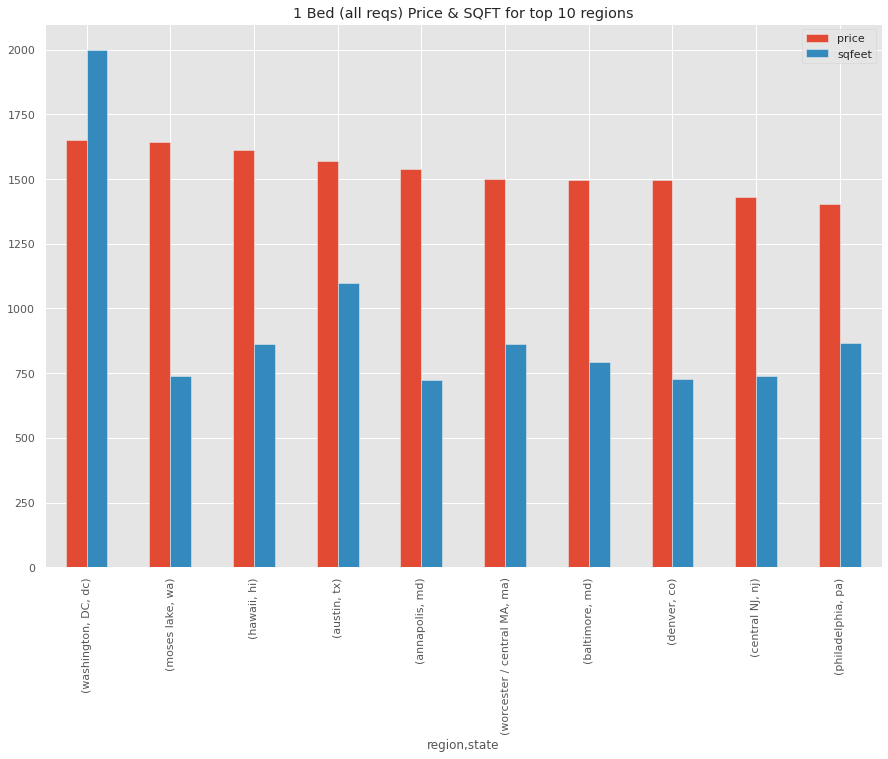

In [56]:
#@title Price and Sq fees for top 10 region that fits Riccardo's requirements

one_bed[((df['laundry_options'] == 'w/d in unit')  & (df['comes_furnished'] == 1) & (df["cats_allowed"] == 1) & (df['dogs_allowed'] == 1) & (one_bed['smoking_status'] == 'yes'))].groupby(['region','state'])[['price', 'sqfeet']].mean().sort_values('price', ascending=False).head(10).plot(kind='bar', figsize=(15,10))
plt.title('1 Bed (all reqs) Price & SQFT for top 10 regions')
plt.style.use('ggplot')

### We can see the Sq feet for the money you pay, the best value you will get is Austin, TX and Ventura County, CA. These locations are ideal for young profession.

In [57]:
one_bed[((one_bed['laundry_options'] == 'w/d in unit')  & (one_bed['comes_furnished'] == 1) & (one_bed["cats_allowed"] == 1) & (one_bed['dogs_allowed'] == 1) & (one_bed['smoking_status'] == 'yes'))].shape

(136, 25)

## 136 total observations in the 1 bedroom DF fit these requirements

# **Senario 2: Married Couple, 2 kids**

**Requirements**

- 4 beds
- 2 baths or more
- W/D in unit
- Pets allowed
- SQFT >= 1500
- Parking = Attached Garage
- budget = 3250 Max

In [58]:
#@title Create a data frame for appartment that have over 4 bedroom and rent below $3250
# DF for apartemnts with 4 bedrooms
four_beds = apt_df[(apt_df['beds'] == 4) & (apt_df['price'] <= 3250)]

## Best Bang for Buck as far as Price to Square footage.

In [59]:
#@title Top 10 states by Sq feet and Avg feet
four_beds.groupby(['region','state'])[['price' ,'sqfeet']].mean().sort_values(['sqfeet', 'price'], ascending=[False, True]).head(10)

,,price,sqfeet
region,state,,
savannah / hinesville,ga,1950.00,2880.0
el paso,tx,2250.00,2739.0
inland empire,ca,2075.00,2597.5
myrtle beach,sc,2073.75,2525.0
southern WV,wv,1350.00,2500.0
baltimore,md,2100.00,2500.0
boise,id,1850.00,2417.0
nashville,tn,2407.50,2298.0
northern michigan,mi,1050.00,2200.0


In [60]:
#@title Top 10 regions with higest Avg price per Sq feet
four_beds[((four_beds['laundry_options'] == 'w/d in unit') & (four_beds["cats_allowed"] == 1) & (four_beds['dogs_allowed'] == 1) & (four_beds['parking_options'] == 'attached garage') & (four_beds['sqfeet'] >= 1500))].groupby(['region','state'])[['price', 'sqfeet']].mean().sort_values(['price', 'sqfeet'], ascending=[False, False]).head(10)

,,price,sqfeet
region,state,,
baton rouge,la,2407.50,2222.0
north dakota,nd,2407.50,2100.0
hudson valley,ny,2407.50,1950.0
san diego,ca,2407.50,1945.5
los angeles,ca,2407.50,1650.0
south florida,fl,2407.50,1646.0
spokane / coeur d'alene,id,2407.50,1568.0
denver,co,2403.75,2387.5
rhode island,ri,2300.00,1772.0


Text(0.5, 1.0, '4 Beds (All reqs) AVG Price & SQFT')

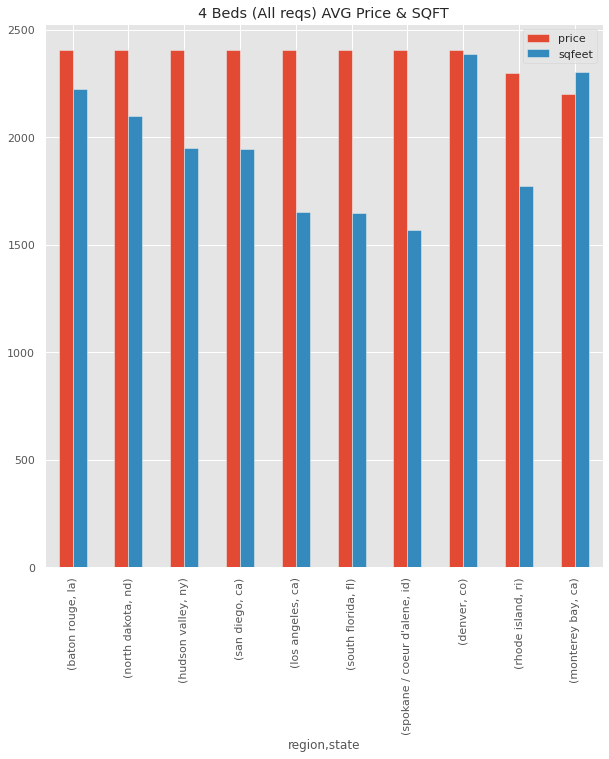

In [61]:
#@title Top 10 steates 4 Beds (All reqs) AVG Price & SQFT
four_beds[((four_beds['laundry_options'] == 'w/d in unit') & (four_beds["cats_allowed"] == 1) & (four_beds['dogs_allowed'] == 1) & (four_beds['parking_options'] == 'attached garage') & (four_beds['sqfeet'] >= 1500))].groupby(['region','state'])[['price', 'sqfeet']].mean().sort_values(['price', 'sqfeet'], ascending=[False, False]).head(10).plot(kind='bar')
plt.title('4 Beds (All reqs) AVG Price & SQFT')

In [62]:
#@title Median Price by SQFT
four_beds[((four_beds['laundry_options'] == 'w/d in unit') & (four_beds["cats_allowed"] == 1) & (four_beds['dogs_allowed'] == 1) & (four_beds['parking_options'] == 'attached garage') & (four_beds['sqfeet'] >= 1500))].groupby(['region','state'])[['price', 'sqfeet']].median().sort_values(['price', 'sqfeet'], ascending=[False, False]).head(10)

,,price,sqfeet
region,state,,
baton rouge,la,2407.50,2222.0
north dakota,nd,2407.50,2100.0
hudson valley,ny,2407.50,1950.0
san diego,ca,2407.50,1945.5
los angeles,ca,2407.50,1650.0
south florida,fl,2407.50,1646.0
spokane / coeur d'alene,id,2407.50,1597.0
denver,co,2403.75,2387.5
rhode island,ri,2300.00,1772.0


In [63]:
#@title Suggested 27 listings
four_beds[((four_beds['laundry_options'] == 'w/d in unit') & (four_beds["cats_allowed"] == 1) & (four_beds['dogs_allowed'] == 1) & (four_beds['parking_options'] == 'attached garage') & (four_beds['sqfeet'] >= 1500))].groupby(['region','state'])[['price', 'sqfeet']].median().sort_values(['price', 'sqfeet'], ascending=[False, False]).shape

(27, 2)

## Only 27 observations for the requirements of the family of 4.

#**Takeaways and more info that would be useful.**

##From this data we were able to pinpoint the location of apartments where one could get the most out of what they pay inregard to the living space and their amentities. It works great to get a general idea however, some important information is missing for one to be able to more fully understand the location they are thinking about moving to.

## Other Factors that would be important here but missing are the cities instead of region, quality of Public or Private schools in the area, population and distance to areas of commerce, time series data and crime.